# Bibliothèques utilisées 

In [1]:
import pandas as pd

# Comprendre et Visualiser les Données

In [2]:
df = pd.read_csv('hmeq.csv')


In [9]:
random_sample = df.sample(n=5 ,random_state=42)  
random_sample

      BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
1344    0  10600  44696.0   57686.0  DebtCon  Office   0.0    0.0     0.0   
625     0   7800  38506.0   50309.0  DebtCon   Other  11.0    0.0     0.0   
5908    0  65100  67389.0  142740.0  HomeImp  Office   9.0    0.0     1.0   
2991    0  16400  63574.0   88586.0  HomeImp   Other   NaN    0.0     0.0   
1545    0  11300      NaN   28600.0  HomeImp  Office  20.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
1344  170.340974   0.0  20.0  37.792555  
625   231.001195   0.0  32.0  35.906116  
5908  116.906104   0.0  11.0  43.368718  
2991  298.146552   0.0  20.0  29.153372  
1545  190.031218   0.0  15.0  39.008673  


In [14]:
df_describe=df.describe(include='all')
df_describe

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


# Analyse et Gestion des Valeurs Manquantes

In [5]:
print(df.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


## Gestion des données manquantes :

In [6]:
df['REASON'].fillna(df['REASON'].mode()[0], inplace=True)
df['JOB'].fillna(df['JOB'].mode()[0], inplace=True)
df.fillna(df.median(), inplace=True)


# Conversion des Variables Catégoriques

In [8]:
df = pd.get_dummies(df, columns=['REASON', 'JOB'], drop_first=True)

# Exploration des Relations entre les Variables

## Distribution de la variable cible « BAD »

In [10]:
print(df['BAD'].value_counts(normalize=True))

0    0.800503
1    0.199497
Name: BAD, dtype: float64


## Analyse de corrélation

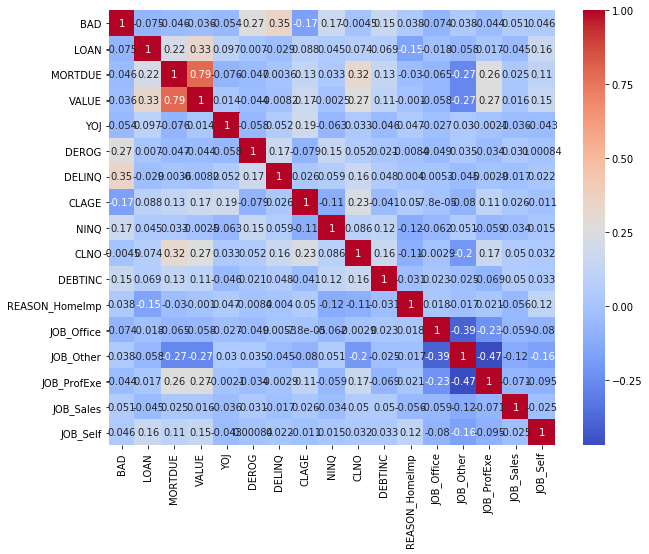

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Histogrammes des variables numériques

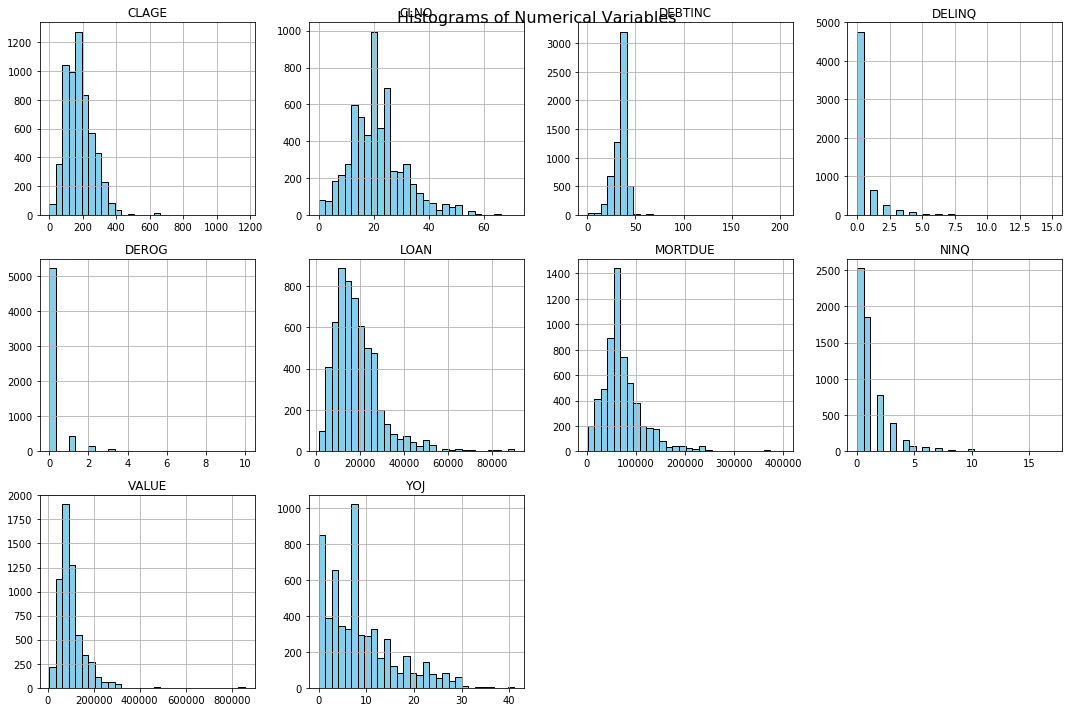

In [13]:
numeric_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(3, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

## Box plots pour la variable cible « BAD »

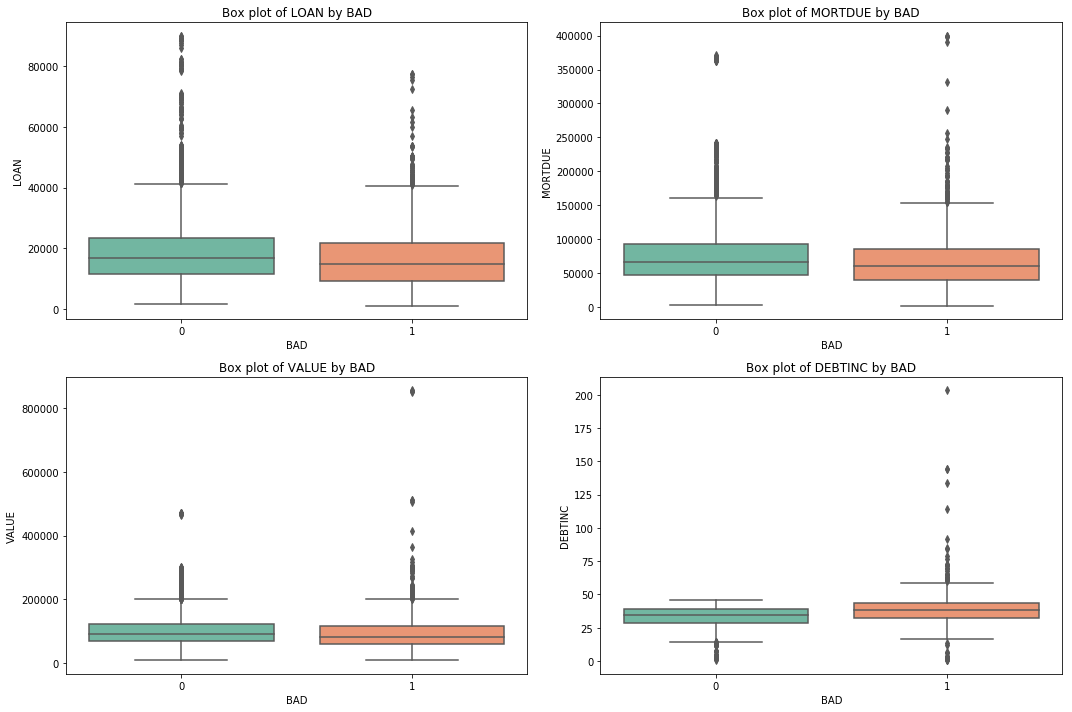

In [15]:
plt.figure(figsize=(15, 10))
variables = ['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC']
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='BAD', y=var, data=df, palette='Set2')
    plt.title(f'Box plot of {var} by BAD')
plt.tight_layout()
plt.show()

## Scatter plots pour la relation entre deux variables continues

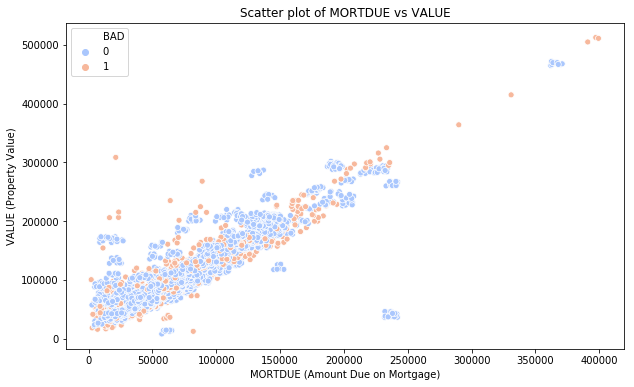

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MORTDUE', y='VALUE', hue='BAD', data=df, palette='coolwarm')

plt.title('Scatter plot of MORTDUE vs VALUE')
plt.xlabel('MORTDUE (Amount Due on Mortgage)')
plt.ylabel('VALUE (Property Value)')
plt.show()

## Matrice de corrélation (Heatmap)

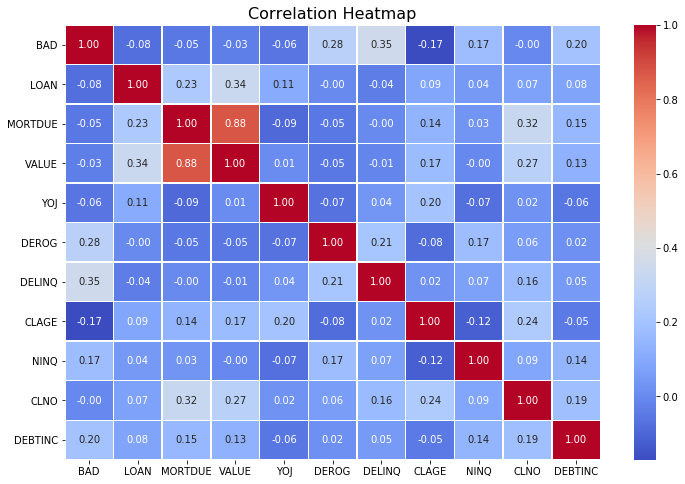

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Analyse du déséquilibre des classes

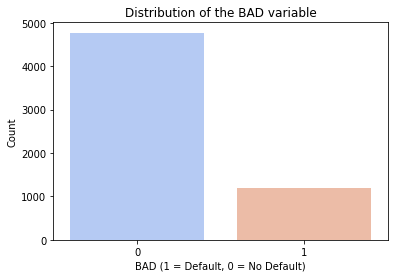

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='BAD', data=df, palette='coolwarm')
plt.title('Distribution of the BAD variable')
plt.xlabel('BAD (1 = Default, 0 = No Default)')
plt.ylabel('Count')
plt.show()

## Étude des Outliers

In [21]:
loan_desc = df['LOAN'].describe()
print(loan_desc)

count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64


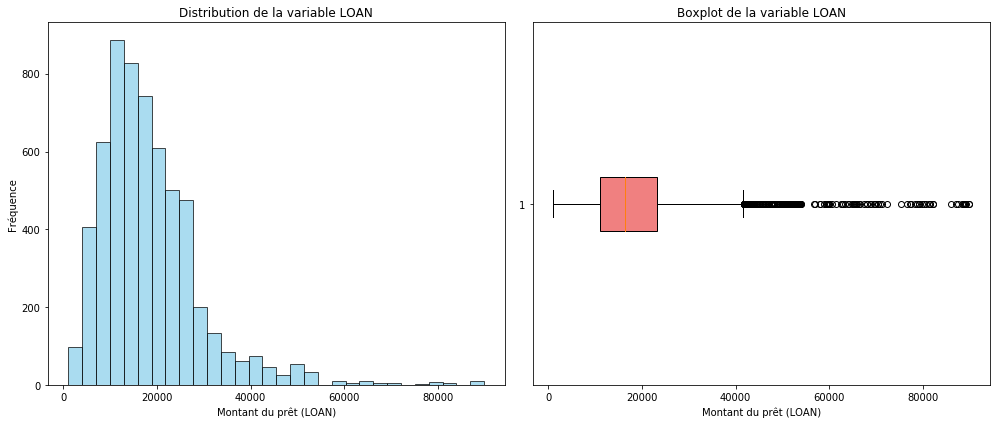

In [25]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
plt.hist(df['LOAN'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution de la variable LOAN')
plt.xlabel('Montant du prêt (LOAN)')
plt.ylabel('Fréquence')
plt.subplot(1, 2, 2)  
plt.boxplot(df['LOAN'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Boxplot de la variable LOAN')
plt.xlabel('Montant du prêt (LOAN)')
plt.tight_layout()
plt.show()



In [27]:
Q1 = df['LOAN'].quantile(0.25)
Q3 = df['LOAN'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['LOAN'] < lower_bound) | (df['LOAN'] > upper_bound)]
print(f'Nombre d\'outliers détectés : {len(outliers)}')

Nombre d'outliers détectés : 256


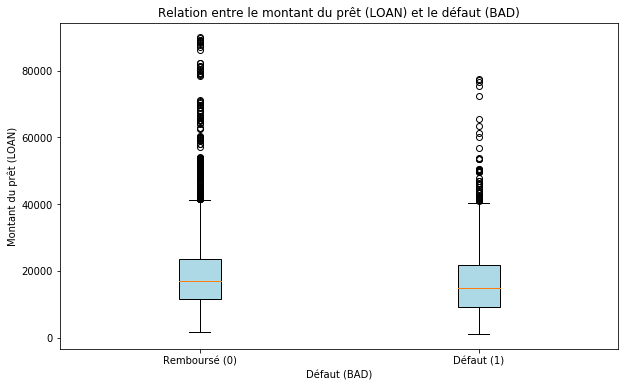

LOAN
(1011.2, 9980.0]      0.284956
(9980.0, 18860.0]     0.192261
(18860.0, 27740.0]    0.157197
(27740.0, 36620.0]    0.138425
(36620.0, 45500.0]    0.266304
(45500.0, 54380.0]    0.254386
(54380.0, 63260.0]    0.166667
(63260.0, 72140.0]    0.076923
(72140.0, 81020.0]    0.384615
(81020.0, 89900.0]    0.000000
Name: BAD, dtype: float64


In [28]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['BAD'] == 0]['LOAN'].dropna(), df[df['BAD'] == 1]['LOAN'].dropna()], 
             labels=['Remboursé (0)', 'Défaut (1)'], patch_artist=True,
             boxprops=dict(facecolor='lightblue'))
plt.title('Relation entre le montant du prêt (LOAN) et le défaut (BAD)')
plt.xlabel('Défaut (BAD)')
plt.ylabel('Montant du prêt (LOAN)')
plt.show()
loan_bad_rate = df.groupby(pd.cut(df['LOAN'], bins=10))['BAD'].mean()
print(loan_bad_rate)



In [30]:
missing_mortdue = df['MORTDUE'].isnull().sum()
print(f'Nombre de valeurs manquantes dans la colonne MORTDUE : {missing_mortdue}')

Nombre de valeurs manquantes dans la colonne MORTDUE : 518


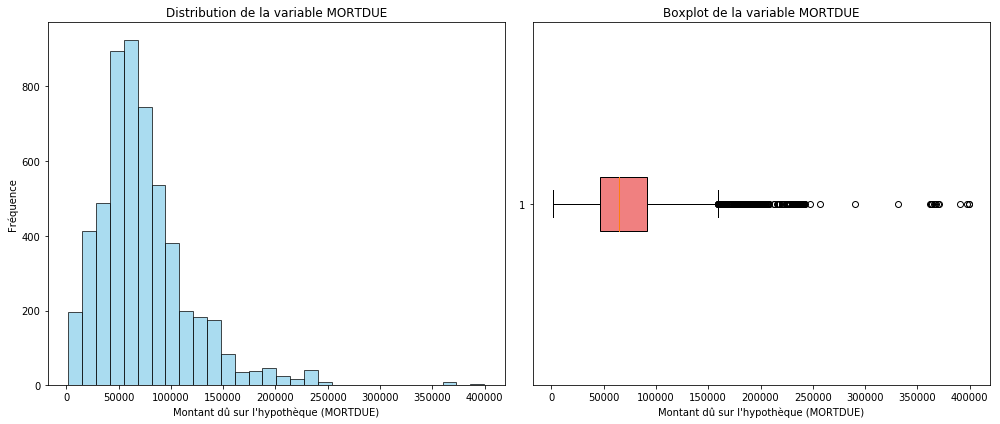

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
plt.hist(df['MORTDUE'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution de la variable MORTDUE')
plt.xlabel('Montant dû sur l\'hypothèque (MORTDUE)')
plt.ylabel('Fréquence')
plt.subplot(1, 2, 2)  
plt.boxplot(df['MORTDUE'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Boxplot de la variable MORTDUE')
plt.xlabel('Montant dû sur l\'hypothèque (MORTDUE)')
plt.tight_layout()
plt.show()


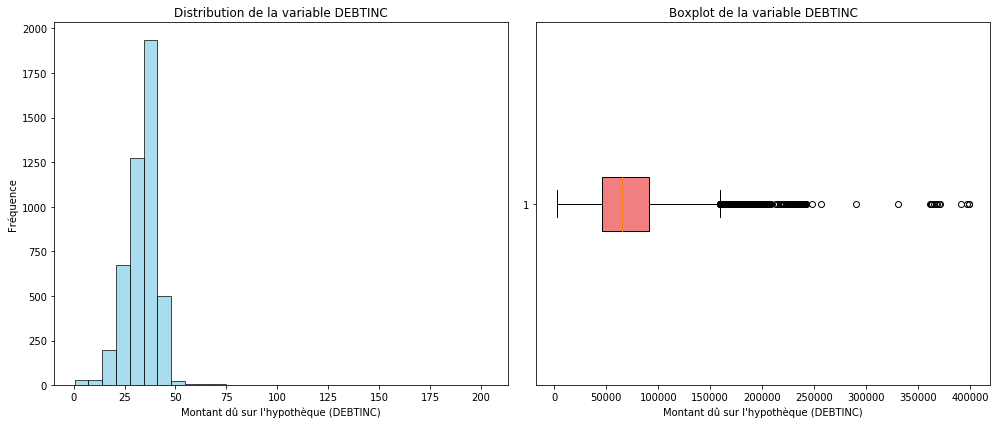

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
plt.hist(df['DEBTINC'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution de la variable DEBTINC')
plt.xlabel('Montant dû sur l\'hypothèque (DEBTINC)')
plt.ylabel('Fréquence')
plt.subplot(1, 2, 2)  
plt.boxplot(df['MORTDUE'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Boxplot de la variable DEBTINC')
plt.xlabel('Montant dû sur l\'hypothèque (DEBTINC)')
plt.tight_layout()
plt.show()

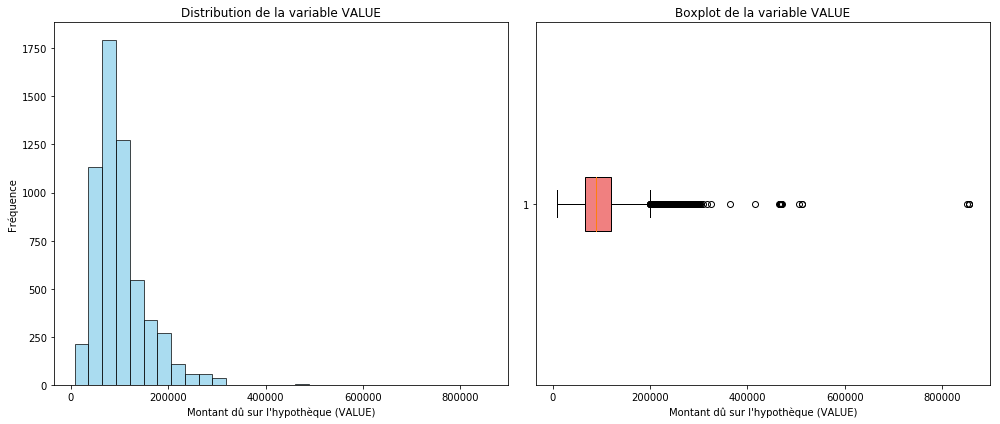

In [45]:

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
plt.hist(df['VALUE'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution de la variable VALUE')
plt.xlabel('Montant dû sur l\'hypothèque (VALUE)')
plt.ylabel('Fréquence')
plt.subplot(1, 2, 2)  
plt.boxplot(df['VALUE'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Boxplot de la variable VALUE')
plt.xlabel('Montant dû sur l\'hypothèque (VALUE)')
plt.tight_layout()
plt.show()


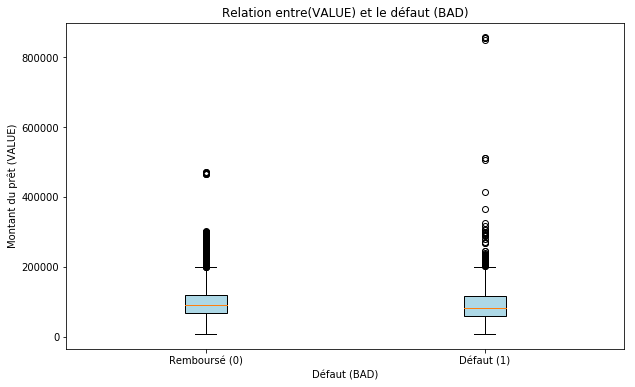

VALUE
(7152.091, 92790.9]     0.210443
(92790.9, 177581.8]     0.156845
(177581.8, 262372.7]    0.131818
(262372.7, 347163.6]    0.191489
(347163.6, 431954.5]    1.000000
(431954.5, 516745.4]    0.250000
(516745.4, 601536.3]         NaN
(601536.3, 686327.2]         NaN
(686327.2, 771118.1]         NaN
(771118.1, 855909.0]    1.000000
Name: BAD, dtype: float64


In [47]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['BAD'] == 0]['VALUE'].dropna(), df[df['BAD'] == 1]['VALUE'].dropna()], 
             labels=['Remboursé (0)', 'Défaut (1)'], patch_artist=True,
             boxprops=dict(facecolor='lightblue'))
plt.title('Relation entre(VALUE) et le défaut (BAD)')
plt.xlabel('Défaut (BAD)')
plt.ylabel('Montant du prêt (VALUE)')
plt.show()
loan_bad_rate = df.groupby(pd.cut(df['VALUE'], bins=10))['BAD'].mean()
print(loan_bad_rate)



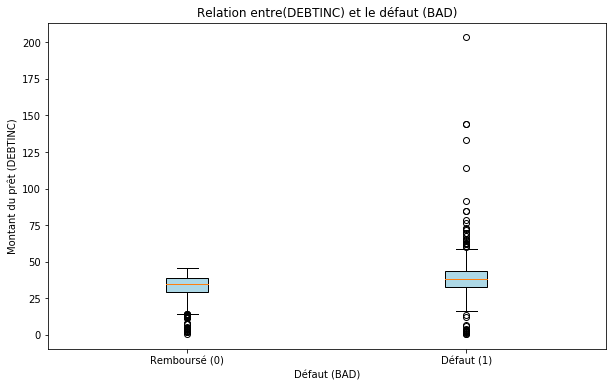

DEBTINC
(0.322, 20.803]       0.090196
(20.803, 41.082]      0.061277
(41.082, 61.361]      0.221172
(61.361, 81.64]       1.000000
(81.64, 101.918]      1.000000
(101.918, 122.197]    1.000000
(122.197, 142.476]    1.000000
(142.476, 162.755]    1.000000
(162.755, 183.033]         NaN
(183.033, 203.312]    1.000000
Name: BAD, dtype: float64


In [49]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['BAD'] == 0]['DEBTINC'].dropna(), df[df['BAD'] == 1]['DEBTINC'].dropna()], 
             labels=['Remboursé (0)', 'Défaut (1)'], patch_artist=True,
             boxprops=dict(facecolor='lightblue'))
plt.title('Relation entre(DEBTINC) et le défaut (BAD)')
plt.xlabel('Défaut (BAD)')
plt.ylabel('Montant du prêt (DEBTINC)')
plt.show()
loan_bad_rate = df.groupby(pd.cut(df['DEBTINC'], bins=10))['BAD'].mean()
print(loan_bad_rate)


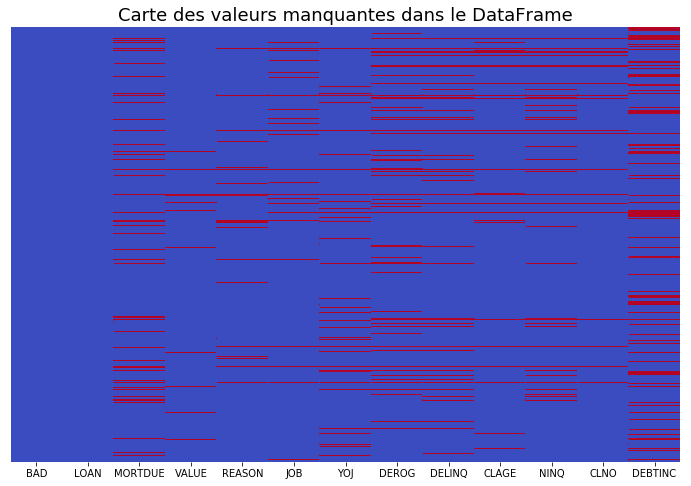

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))  
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm', yticklabels=False, 
            cbar_kws={'label': 'Valeurs Manquantes'})
plt.title('Carte des valeurs manquantes dans le DataFrame', fontsize=18)
plt.show()


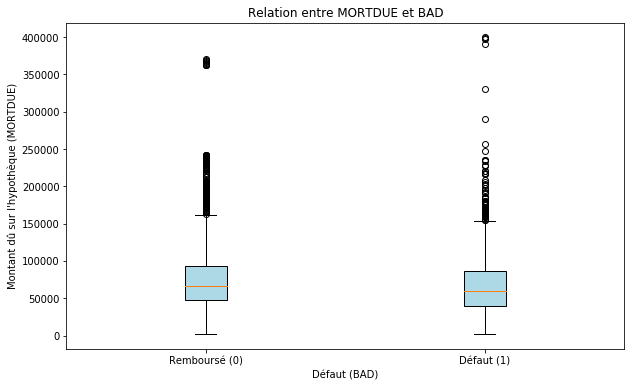

In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['BAD'] == 0]['MORTDUE'].dropna(), df[df['BAD'] == 1]['MORTDUE'].dropna()], 
             labels=['Remboursé (0)', 'Défaut (1)'], patch_artist=True,
             boxprops=dict(facecolor='lightblue'))
plt.title('Relation entre MORTDUE et BAD')
plt.xlabel('Défaut (BAD)')
plt.ylabel('Montant dû sur l\'hypothèque (MORTDUE)')
plt.show()


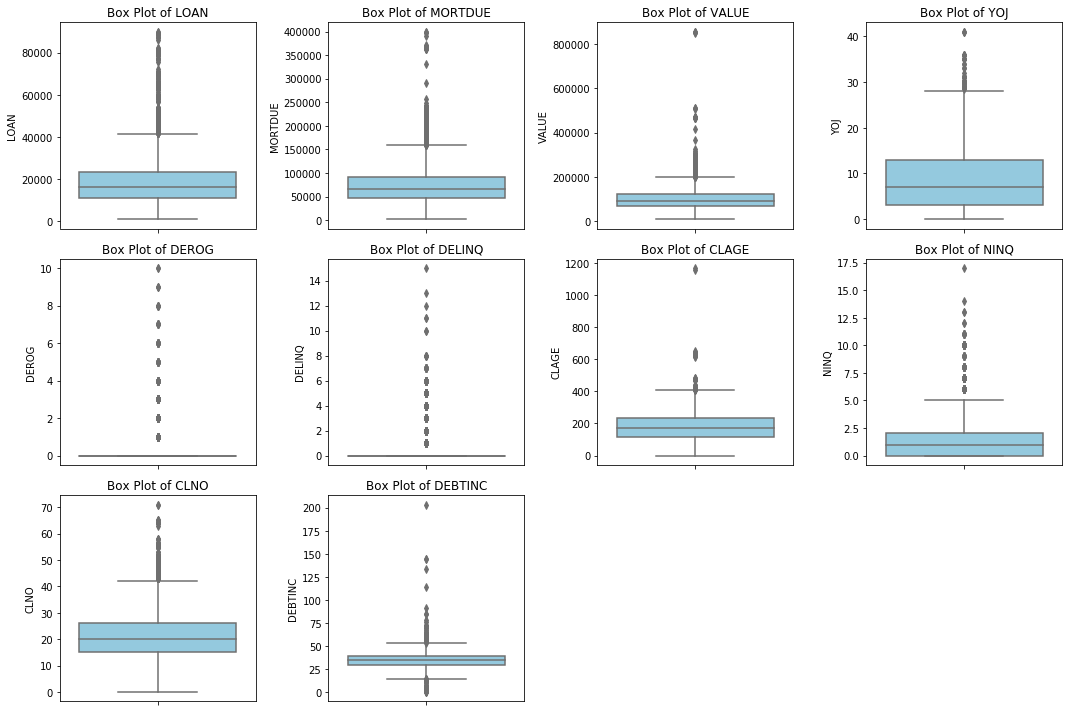

In [19]:
plt.figure(figsize=(15,10))
for i, var in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=var, data=df, color='skyblue')
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

## Feature Engineering

In [21]:
df['MORTGAGE_RATIO'] = df['MORTDUE'] / df['VALUE']


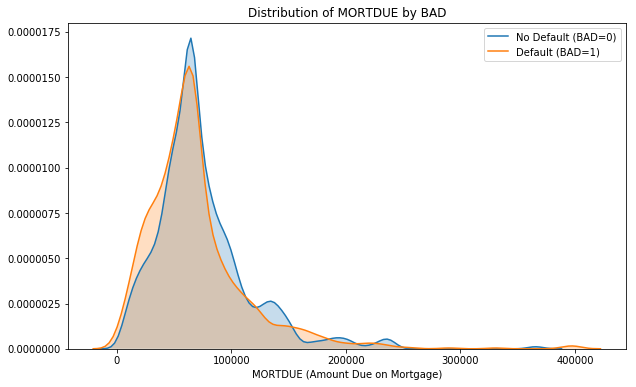

In [25]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['BAD']==0]['MORTDUE'], label='No Default (BAD=0)', shade=True)
sns.kdeplot(df[df['BAD']==1]['MORTDUE'], label='Default (BAD=1)', shade=True)

plt.title('Distribution of MORTDUE by BAD')
plt.xlabel('MORTDUE (Amount Due on Mortgage)')
plt.legend()
plt.show()

In [29]:
print(df[['MORTDUE', 'LOAN']].isnull().sum())

MORTDUE    518
LOAN         0
dtype: int64


In [24]:
df['MORTDUE'].fillna(df['MORTDUE'].median(), inplace=True)

# Si nécessaire, appliquer la même méthode à d'autres colonnes
df['BAD'].fillna(df['BAD'].median(), inplace=True)